# Instore Prices

## Config

In [1]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import seaborn as sns
import sys

sys.path.append('c:\\Users\\Jordi Cremades\\Documents\\Repos\\central-node')

from utils import query_engines

palette = sns.color_palette()
blue = palette[0]
orange = palette[1]
green = palette[2]
red = palette[3]
purple = palette[4]
brown = palette[5]
pink = palette[6]
gray = palette[7]
olive = palette[8]
cyan = palette[9]

## Distribution of customers NSW

In [2]:
q = query_engines.QueryEngines(reset_query_logs=True, reset_to_load=False)

QUERY_FILE = 'v5/customer_distribution_nsw.sql'
OUTPUT_FILE = 'customer_distribution_nsw'
LOAD_FROM_OUTPUT_FILE = 'customer_distribution_nsw'
PRINT_QUERY = True

START_DATE = "'2023-12-01'"
END_DATE = "'2024-07-01'"

params = [
    # dates
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)},
]

q.prepare_query(QUERY_FILE, params=params)

df  = q.query_run_starburst( #query_run_livedb otherwise
    output_file=OUTPUT_FILE,
    load_from_output_file=LOAD_FROM_OUTPUT_FILE,
    print_query=PRINT_QUERY
)

df.head()

,nswg_variant,p_creation_date,ce_events
0,Variant 1,2024-03-15,298948
1,NaN,2024-02-18,8671
2,NaN,2023-12-24,15053
3,Control Group,2023-12-16,34403
4,Variant 1,2024-03-28,312231


In [3]:
df['nswg_variant'] = df['nswg_variant'].fillna('variant_not_found')
df = df.rename(columns={'ce_events': 'n_customers'})

df_date = df.groupby('p_creation_date')['n_customers'].sum().reset_index()
df_date.columns = ['p_creation_date', 'total_customers']

df_merged = pd.merge(df, df_date, on='p_creation_date')
df_merged['share'] = (df_merged['n_customers'] / df_merged['total_customers']) * 1.00

df_merged.sort_values(by='p_creation_date', inplace=True)
df_merged.head()


,nswg_variant,p_creation_date,n_customers,total_customers,share
312,Control Group,2023-12-01,12063,363462,0.033189
313,variant_not_found,2023-12-01,243938,363462,0.671151
314,Variant 1,2023-12-01,107461,363462,0.295660
786,Control Group,2023-12-02,15835,401035,0.039485
785,Variant 1,2023-12-02,140446,401035,0.350209


<Figure size 640x480 with 0 Axes>

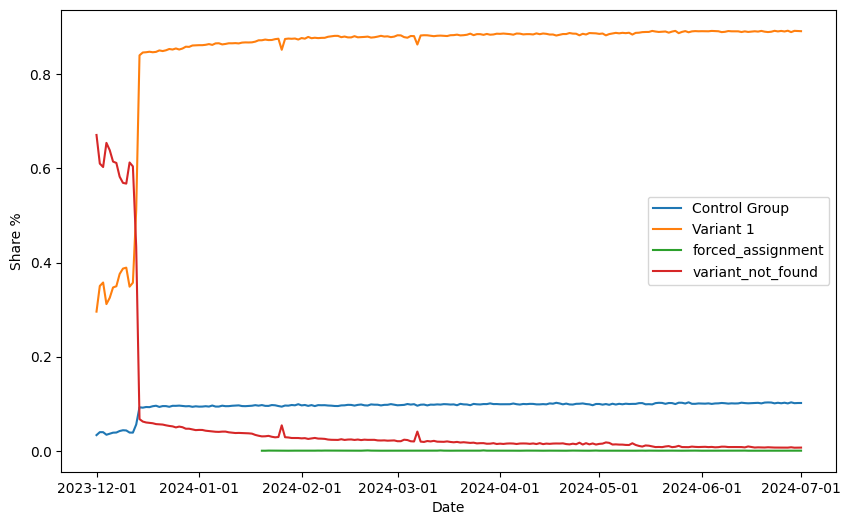

In [9]:
# plot

plt.clf()
df_merged['p_creation_date'] = pd.to_datetime(df_merged['p_creation_date'])

fig, ax = plt.subplots(figsize=(10, 6))

VARIANT = 'Control Group'
tmp = df_merged[df_merged['nswg_variant'] == VARIANT]
ax.plot(tmp['p_creation_date'], tmp['share'], color=blue, label=VARIANT)

VARIANT = 'Variant 1'
tmp = df_merged[df_merged['nswg_variant'] == VARIANT]
ax.plot(tmp['p_creation_date'], tmp['share'], color=orange, label=VARIANT)

VARIANT = 'forced_assignment'
tmp = df_merged[df_merged['nswg_variant'] == VARIANT]
ax.plot(tmp['p_creation_date'], tmp['share'], color=green, label=VARIANT) 

VARIANT = 'variant_not_found'
tmp = df_merged[df_merged['nswg_variant'] == VARIANT]
ax.plot(tmp['p_creation_date'], tmp['share'], color=red, label=VARIANT)

ax.set(xlabel='Date', 
       ylabel='Share %',
       title='')

# Setting date format on x-axis
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

ax.grid(False)
ax.legend()

plt.show()

## Distribution of customers Instore Prices

In [10]:
q = query_engines.QueryEngines(reset_query_logs=True, reset_to_load=False)

QUERY_FILE = 'v5/customer_distribution_instore.sql'
OUTPUT_FILE = 'customer_distribution_instore'
LOAD_FROM_OUTPUT_FILE = 'customer_distribution_instore'
PRINT_QUERY = True

START_DATE = "'2023-12-01'"
END_DATE = "'2024-07-01'"

params = [
    # dates
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)},
]

q.prepare_query(QUERY_FILE, params=params)

df  = q.query_run_starburst( #query_run_livedb otherwise
    output_file=OUTPUT_FILE,
    load_from_output_file=LOAD_FROM_OUTPUT_FILE,
    print_query=PRINT_QUERY
)

df.head()

,nswg_variant,p_creation_date,ce_events
0,InStorePrices,2024-05-27,48763
1,InStorePrices,2024-06-24,51280
2,InStorePrices,2024-05-18,58001
3,Control Group,2024-03-06,152078
4,InStorePrices,2023-12-23,518


In [12]:
df = df.rename(columns={'ce_events': 'n_customers'})
df = df.rename(columns={'nswg_variant': 'instore_variant'})

df['instore_variant'] = df['instore_variant'].fillna('variant_not_found')

df_date = df.groupby('p_creation_date')['n_customers'].sum().reset_index()
df_date.columns = ['p_creation_date', 'total_customers']

df_merged = pd.merge(df, df_date, on='p_creation_date')
df_merged['share'] = (df_merged['n_customers'] / df_merged['total_customers']) * 1.00

df_merged.sort_values(by='p_creation_date', inplace=True)
df_merged.head()


,instore_variant,p_creation_date,n_customers,total_customers,share
17,variant_not_found,2023-12-01,363462,363462,1.0
218,variant_not_found,2023-12-02,401035,401035,1.0
576,variant_not_found,2023-12-03,383859,383859,1.0
492,variant_not_found,2023-12-04,336490,336490,1.0
126,variant_not_found,2023-12-05,337857,337857,1.0


In [13]:
df_merged['instore_variant'].unique()

array(['variant_not_found', 'InStorePrices', 'Control Group'],
      dtype=object)

<Figure size 640x480 with 0 Axes>

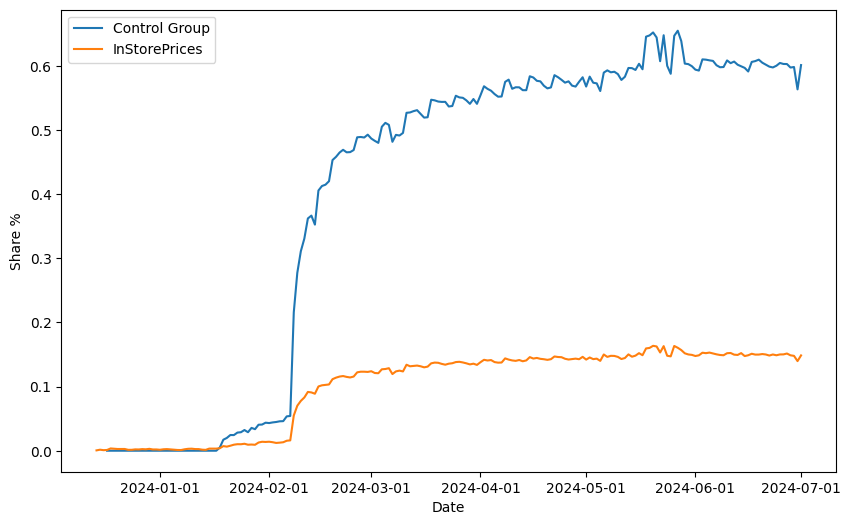

In [18]:
# plot

plt.clf()
df_merged['p_creation_date'] = pd.to_datetime(df_merged['p_creation_date'])

fig, ax = plt.subplots(figsize=(10, 6))

VARIANT = 'Control Group'
tmp = df_merged[df_merged['instore_variant'] == VARIANT]
ax.plot(tmp['p_creation_date'], tmp['share'], color=blue, label=VARIANT)

VARIANT = 'InStorePrices'
tmp = df_merged[df_merged['instore_variant'] == VARIANT]
ax.plot(tmp['p_creation_date'], tmp['share'], color=orange, label=VARIANT)

# VARIANT = 'variant_not_found'
# tmp = df_merged[df_merged['instore_variant'] == VARIANT]
# ax.plot(tmp['p_creation_date'], tmp['share'], color=red, label=VARIANT)

ax.set(xlabel='Date', 
       ylabel='Share %',
       title='')

# Setting date format on x-axis
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

ax.grid(False)
ax.legend()

plt.show()

In [93]:
df_merged['p_creation_date'] = pd.to_datetime(df_merged['p_creation_date'])
df_merged[df_merged['p_creation_date'] == '2024-07-01']

,instore_variant,p_creation_date,n_customers,total_customers,share
422,Control Group,2024-07-01,196852,327277,0.601484
420,InStorePrices,2024-07-01,48653,327277,0.148660
421,variant_not_found,2024-07-01,81772,327277,0.249856


## Distribution of volumes through time

In [95]:
q = query_engines.QueryEngines(reset_query_logs=True, reset_to_load=False)

QUERY_FILE = 'v5/customer_distribution_nsw.sql'
OUTPUT_FILE = 'customer_distribution_nsw'
LOAD_FROM_OUTPUT_FILE = 'customer_distribution_nsw'
PRINT_QUERY = True

q.prepare_query(QUERY_FILE, params=params)

df  = q.query_run_starburst( #query_run_livedb otherwise
    output_file=OUTPUT_FILE,
    load_from_output_file=LOAD_FROM_OUTPUT_FILE,
    print_query=PRINT_QUERY
)

df.head()

,nswg_variant,p_creation_date,ce_events
0,Variant 1,2024-03-15,298948
1,NaN,2024-02-18,8671
2,NaN,2023-12-24,15053
3,Control Group,2023-12-16,34403
4,Variant 1,2024-03-28,312231


In [97]:
df['nswg_variant'] = df['nswg_variant'].fillna('variant_not_found')
# df = df.rename(columns={'ce_events': 'n_customers'})

df_date = df.groupby('p_creation_date')['n_customers'].sum().reset_index()
df_date.columns = ['p_creation_date', 'total_customers']

df_merged = pd.merge(df, df_date, on='p_creation_date')
df_merged['share'] = (df_merged['n_customers'] / df_merged['total_customers']) * 1.00

df_merged.sort_values(by='p_creation_date', inplace=True)
df_merged.head()


,nswg_variant,p_creation_date,n_customers,total_customers,share
312,Control Group,2023-12-01,12063,363462,0.033189
313,variant_not_found,2023-12-01,243938,363462,0.671151
314,Variant 1,2023-12-01,107461,363462,0.295660
786,Control Group,2023-12-02,15835,401035,0.039485
785,Variant 1,2023-12-02,140446,401035,0.350209


In [ ]:
volumes = df_merged[['p_creation_date','total_customers']]
tmp = volumes.drop_duplicates()
tmp['p_creation_date'] = pd.to_datetime(tmp['p_creation_date'])
tmp.sort_values(by='p_creation_date', inplace=True)

Disclaimer - We are not counting distinct customers because of a query error - thus this is representing the events and not distinct customers

<Figure size 640x480 with 0 Axes>

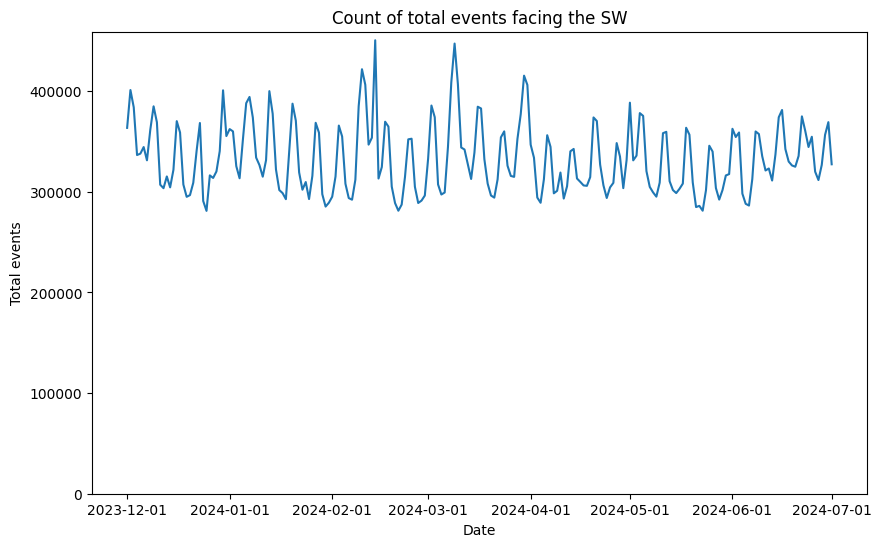

In [115]:
# plot
plt.clf()

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(tmp['p_creation_date'], tmp['total_customers'], color=blue)

ax.set(xlabel='Date', 
       ylabel='Total events',
       title='Count of total events facing the SW')

# Format x-axis to show fewer date labels
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Show one label per month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Set y-axis minimum value to zero
ax.set_ylim(bottom=0)

ax.grid(False)

plt.show()

In [116]:
q = query_engines.QueryEngines(reset_query_logs=True, reset_to_load=False)

QUERY_FILE = 'v5/customer_distribution_instore.sql'
OUTPUT_FILE = 'customer_distribution_instore'
LOAD_FROM_OUTPUT_FILE = 'customer_distribution_instore'
PRINT_QUERY = True

q.prepare_query(QUERY_FILE, params=params)

df  = q.query_run_starburst( #query_run_livedb otherwise
    output_file=OUTPUT_FILE,
    load_from_output_file=LOAD_FROM_OUTPUT_FILE,
    print_query=PRINT_QUERY
)

df.head()

,nswg_variant,p_creation_date,ce_events
0,InStorePrices,2024-05-27,48763
1,InStorePrices,2024-06-24,51280
2,InStorePrices,2024-05-18,58001
3,Control Group,2024-03-06,152078
4,InStorePrices,2023-12-23,518


In [117]:
df = df.rename(columns={'ce_events': 'n_customers'})
df = df.rename(columns={'nswg_variant': 'instore_variant'})

df['instore_variant'] = df['instore_variant'].fillna('variant_not_found')

df_date = df.groupby('p_creation_date')['n_customers'].sum().reset_index()
df_date.columns = ['p_creation_date', 'total_customers']

df_merged = pd.merge(df, df_date, on='p_creation_date')
df_merged['share'] = (df_merged['n_customers'] / df_merged['total_customers']) * 1.00

df_merged.sort_values(by='p_creation_date', inplace=True)
df_merged.head()


,instore_variant,p_creation_date,n_customers,total_customers,share
17,variant_not_found,2023-12-01,363462,363462,1.0
218,variant_not_found,2023-12-02,401035,401035,1.0
576,variant_not_found,2023-12-03,383859,383859,1.0
492,variant_not_found,2023-12-04,336490,336490,1.0
126,variant_not_found,2023-12-05,337857,337857,1.0


In [ ]:
volumes = df_merged[['p_creation_date','total_customers']]
tmp = volumes.drop_duplicates()
tmp['p_creation_date'] = pd.to_datetime(tmp['p_creation_date'])
tmp.sort_values(by='p_creation_date', inplace=True)

Disclaimer - We are not counting distinct customers because of a query error - thus this is representing the events and not distinct customers

<Figure size 640x480 with 0 Axes>

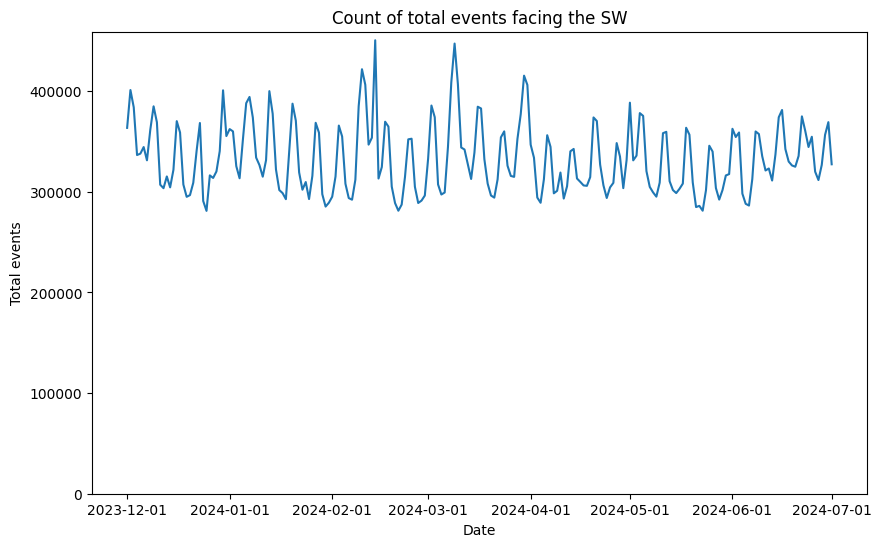

In [119]:
# plot
plt.clf()

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(tmp['p_creation_date'], tmp['total_customers'], color=blue)

ax.set(xlabel='Date', 
       ylabel='Total events',
       title='Count of total events facing the SW')

# Format x-axis to show fewer date labels
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Show one label per month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Set y-axis minimum value to zero
ax.set_ylim(bottom=0)

ax.grid(False)

plt.show()

As expected - the same number of customers should appear in both graphs. As the number of events that opens the category is the number of events that is being counted. Then depending on how we categorize them in terms of variant and control is another thing.

## Build query to obtain all metrics

In [4]:
q = query_engines.QueryEngines(reset_query_logs=True, reset_to_load=False)

QUERY_FILE = 'v5/metrics.sql'
OUTPUT_FILE = 'metrics'
LOAD_FROM_OUTPUT_FILE = 'metrics'
PRINT_QUERY = True

START_DATE = "'2023-12-01'"
END_DATE = "'2024-07-01'"

params = [
    # dates
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)},
]

q.prepare_query(QUERY_FILE, params=params)

df  = q.query_run_starburst( #query_run_livedb otherwise
    output_file=OUTPUT_FILE,
    load_from_output_file=LOAD_FROM_OUTPUT_FILE,
    print_query=PRINT_QUERY
)

df.head()

,p_creation_date,city,country,platform,n_stores_instore_price_enabled,is_recurrent_groceries,variant,ce_dynamic_session_id,oe_dynamic_session_id,n_orders,n_customers,sum_order_total_purchase_eur,n_ret_orders_s,n_ret_orders_g
0,2023-12-31,TIM,RO,Android,5,True,NaN,309,88,83,88,2137.081020,48,75
1,2024-03-18,ZHY,UA,Android,3,False,NaN,27,3,3,3,59.655194,2,3
2,2024-06-10,NUR,KZ,Android,3,True,NaN,18,2,2,2,27.094608,0,0
3,2024-04-09,OVD,ES,IOS,2,False,NaN,20,5,5,5,38.870000,1,1
4,2024-05-28,WAW,PL,IOS,9,True,Control Group,1683,709,704,693,16739.048672,482,601


In [5]:
# data cleaning
df = df[~df['variant'].isnull()]

# nulls
df['sum_order_total_purchase_eur'] = df['sum_order_total_purchase_eur'].fillna(0.0)

# dates
df['p_creation_date'] = pd.to_datetime(df['p_creation_date'])
df['month_start'] = df['p_creation_date'].dt.to_period('M').dt.to_timestamp()
df['week_start'] = df['p_creation_date'].dt.to_period('W').apply(lambda r: r.start_time)
df.head()

,p_creation_date,city,country,platform,n_stores_instore_price_enabled,is_recurrent_groceries,variant,ce_dynamic_session_id,oe_dynamic_session_id,n_orders,n_customers,sum_order_total_purchase_eur,n_ret_orders_s,n_ret_orders_g,month_start,week_start
4,2024-05-28,WAW,PL,IOS,9,True,Control Group,1683,709,704,693,16739.048672,482,601,2024-05-01,2024-05-27
6,2024-05-24,MAD,ES,IOS,3,True,Control Group,3377,1173,1171,1142,35222.290000,771,1039,2024-05-01,2024-05-20
9,2024-05-22,BUC,RO,Android,10,True,Control Group,1871,777,769,754,21171.245874,561,693,2024-05-01,2024-05-20
10,2024-04-13,MIL,IT,IOS,7,True,Control Group,1714,370,361,359,10194.110000,183,276,2024-04-01,2024-04-08
11,2024-02-26,CUG,ES,Android,5,True,Control Group,33,19,23,19,776.100000,18,22,2024-02-01,2024-02-26


## Analysis function

In [6]:
def perform_ab_test(
    df # Dataframe containing the data
    ,metric_is_a_ratio:False # Are the metrics already computed or after the grouping a ratio needs to be computed
    ,metric_name # Name of the final metric
    ,multiple_metrics # Names of metrics if ratios need to be computed
    ,groupby_metrics # List containing group metrics
    ,group_granularity # The granularity at which I want to perform the test
    ,variant_column # Name of column where control and variant are labelled
    ,control_label # control label in dataframe - Control Group
    ,variant_label # variant lable in dataframe - Variant Group
    ,alpha
    ):

    # Compute the grouping for minimum granularity
    minimum_granularity_group = groupby_metrics + [group_granularity]
        
    if not metric_is_a_ratio:
        print('------------------------------')
        print('--------UNIQUE METRIC---------')
        print('------------------------------')
        
        # Build dataset for control and variant
        control_df = df[df[variant_column] == control_label].groupby(minimum_granularity_group)[metric_name].sum().reset_index()
        variant_df = df[df[variant_column] == variant_label].groupby(minimum_granularity_group)[metric_name].sum().reset_index()
        sanity_check = pd.merge(control_df,variant_df,on=minimum_granularity_group, suffixes=('_control','_variant'), how='outer').copy()
        
        #Group by the specified metrics
        control_group_mean = control_df.groupby(groupby_metrics)[metric_name].mean().reset_index()
        variant_group_mean = variant_df.groupby(groupby_metrics)[metric_name].mean().reset_index()
        
        # Merge
        merged = pd.merge(control_group_mean,variant_group_mean,on=groupby_metrics, suffixes=('_control','_variant'), how='outer')
        
        control_with_sufix = metric_name + '_control'
        variant_with_sufix = metric_name + '_variant'
        merged['delta_perc_100'] = (merged[variant_with_sufix] - merged[control_with_sufix]) / merged[control_with_sufix] * 100
    else:
        print('------------------------------')
        print('--------RATIO METRIC----------')
        print('------------------------------')
        numerator = multiple_metrics[0]
        denominator = multiple_metrics[1]
    
        numerator_control_df = df[df[variant_column] == control_label].groupby(minimum_granularity_group)[numerator].sum().reset_index()
        numerator_variant_df = df[df[variant_column] == variant_label].groupby(minimum_granularity_group)[numerator].sum().reset_index()
        denominator_control_df = df[df[variant_column] == control_label].groupby(minimum_granularity_group)[denominator].sum().reset_index()
        denominator_variant_df = df[df[variant_column] == variant_label].groupby(minimum_granularity_group)[denominator].sum().reset_index()

        control_df = pd.merge(numerator_control_df,denominator_control_df,on=minimum_granularity_group, how='outer')
        variant_df = pd.merge(numerator_variant_df,denominator_variant_df,on=minimum_granularity_group, how='outer')
        
        control_df[metric_name] = control_df[numerator]/control_df[denominator]
        variant_df[metric_name] = variant_df[numerator]/variant_df[denominator]
        sanity_check = pd.merge(control_df,variant_df,on=minimum_granularity_group, suffixes=('_control','_variant'), how='outer')
        
        #Group by the specified metrics
        control_group_mean = control_df.groupby(groupby_metrics)[metric_name].mean().reset_index()
        variant_group_mean = variant_df.groupby(groupby_metrics)[metric_name].mean().reset_index()
        # Merge
        merged = pd.merge(control_group_mean,variant_group_mean,on=groupby_metrics, suffixes=('_control','_variant'), how='outer')
        
        control_with_sufix = metric_name + '_control'
        variant_with_sufix = metric_name + '_variant'
        merged['delta_perc_100'] = (merged[variant_with_sufix] - merged[control_with_sufix]) / merged[control_with_sufix] * 100
    
    # Calculate p-values
    p_values = []
    is_significant = []

    for _, row in merged.iterrows():

        test_granularity_group = minimum_granularity_group + [metric_name]
        
        control_values = control_df[(control_df[groupby_metrics] == row[groupby_metrics]).all(axis=1)][test_granularity_group]
        variant_values = variant_df[(variant_df[groupby_metrics] == row[groupby_metrics]).all(axis=1)][test_granularity_group]
        values = pd.merge(control_values,variant_values,on=minimum_granularity_group, suffixes=('_control','_variant'), how='outer')
        
        _, p_value = ttest_ind(values[control_with_sufix], values[variant_with_sufix], equal_var=False, nan_policy='omit')
 
        p_values.append(p_value)
        
        if p_value <= alpha:
            is_significant.append(True)
        elif p_value > alpha:
            is_significant.append(False)
        else:
            is_significant.append(None)

    merged['p_value'] = p_values
    merged['is_significant'] = is_significant
    
    return merged,sanity_check

## Weight of each Country

In [7]:
w_country = df.groupby('country')['n_orders'].sum().reset_index()

# Calculate the total number of orders
total_orders = w_country['n_orders'].sum()

# Compute the weight each country contributes to the total in percentage
w_country['weight'] = (w_country['n_orders'] / total_orders) * 100

w_country.sort_values(by='weight', ascending=False, inplace=True)

w_country['cumulative_weight'] = w_country['weight'].cumsum()

w_country.reset_index(drop=True)

# to filter
# w_country[:X]

,country,n_orders,weight,cumulative_weight
0,ES,1115992,22.332793,22.332793
1,RO,773989,15.488763,37.821557
2,PL,644551,12.898501,50.720058
3,UA,534943,10.705069,61.425127
4,MA,513640,10.278762,71.703888
5,GE,289873,5.800824,77.504713
6,IT,273365,5.470473,82.975186
7,KE,179809,3.598267,86.573453
8,PT,150907,3.019892,89.593344
9,CI,114685,2.295031,91.888375


## Weight of each City

In [9]:
pd.reset_option('display.max_rows')

In [8]:
w_city = df.groupby('city')['n_orders'].sum().reset_index()

# Calculate the total number of orders
total_orders = w_city['n_orders'].sum()

# Compute the weight each country contributes to the total in percentage
w_city['weight'] = (w_city['n_orders'] / total_orders) * 100

w_city.sort_values(by='weight', ascending=False, inplace=True)

w_city['cumulative_weight'] = w_city['weight'].cumsum()

# Ensure all rows are displayed
pd.set_option('display.max_rows', None)

w_city.reset_index(drop=True)

,city,n_orders,weight,cumulative_weight
0,BUC,338960,6.783134,6.783134
1,MAD,303764,6.078806,12.861940
2,TBI,247350,4.949871,17.811811
3,CAS,225960,4.521823,22.333634
4,WAW,204013,4.082628,26.416261
5,BCN,194413,3.890516,30.306778
6,NBO,157449,3.150807,33.457585
7,KIE,132512,2.651778,36.109363
8,KRA,93843,1.877949,37.987313
9,LIS,90094,1.802926,39.790238


## Hypothesis 1: CVR

### By month

In [27]:
df['p_creation_date'] = pd.to_datetime(df['p_creation_date'])

cond1 = df['p_creation_date'] >= '2024-03-01'
cond2 = df['p_creation_date'] < '2024-07-01'

df_ab = df[(cond1 & cond2)].copy()

METRIC_IS_A_RATIO = True # if true its a ratio between two different
METRIC_NAME = 'nsw_cvr' # name of the final metric
MULTIPLE_METRICS = ['oe_dynamic_session_id','ce_dynamic_session_id'] # metrics to compute ratio, if metric_is_a_ratio
GROUP_BY_METRICS = ['month_start'] # dimensions for final group
GROUP_BY_GRANULARITY = 'p_creation_date' # smaller granularity for t-test 
VARIANT_COLUMN = 'variant' # column name to distingtush variant
CONTROL_LABEL = 'Control Group' # control label
VARIANT_LABEL = 'InStorePrices' # variant label
ALPHA = 0.05 # alpha

tmp,sanity_check = perform_ab_test(
    df_ab
    ,metric_is_a_ratio=METRIC_IS_A_RATIO
    ,metric_name=METRIC_NAME
    ,multiple_metrics=MULTIPLE_METRICS
    ,groupby_metrics=GROUP_BY_METRICS
    ,group_granularity=GROUP_BY_GRANULARITY
    ,variant_column=VARIANT_COLUMN
    ,control_label = CONTROL_LABEL
    ,variant_label = VARIANT_LABEL
    ,alpha = 0.05
)

tmp['improvement'] = tmp['delta_perc_100'] > 0
tmp.sort_values(by='month_start').to_csv('1fig')

------------------------------
--------RATIO METRIC----------
------------------------------


### By country

In [29]:
df['p_creation_date'] = pd.to_datetime(df['p_creation_date'])

cond1 = df['p_creation_date'] >= '2024-04-01'
cond2 = df['p_creation_date'] < '2024-07-01'

df_ab = df[(cond1 & cond2)].copy()

METRIC_IS_A_RATIO = True # if true its a ratio between two different
METRIC_NAME = 'nsw_cvr' # name of the final metric
MULTIPLE_METRICS = ['oe_dynamic_session_id','ce_dynamic_session_id'] # metrics to compute ratio, if metric_is_a_ratio
GROUP_BY_METRICS = ['country'] # dimensions for final group
GROUP_BY_GRANULARITY = 'p_creation_date' # smaller granularity for t-test 
VARIANT_COLUMN = 'variant' # column name to distingtush variant
CONTROL_LABEL = 'Control Group' # control label
VARIANT_LABEL = 'InStorePrices' # variant label
ALPHA = 0.05 # alpha

tmp,sanity_check = perform_ab_test(
    df_ab
    ,metric_is_a_ratio=METRIC_IS_A_RATIO
    ,metric_name=METRIC_NAME
    ,multiple_metrics=MULTIPLE_METRICS
    ,groupby_metrics=GROUP_BY_METRICS
    ,group_granularity=GROUP_BY_GRANULARITY
    ,variant_column=VARIANT_COLUMN
    ,control_label = CONTROL_LABEL
    ,variant_label = VARIANT_LABEL
    ,alpha = 0.05
)

tmp['improvement'] = tmp['delta_perc_100'] > 0

output = pd.merge(tmp, w_country, on='country')
output.sort_values(by='weight', ascending=False).to_csv('2fig')

------------------------------
--------RATIO METRIC----------
------------------------------


### By city

In [33]:
df['p_creation_date'] = pd.to_datetime(df['p_creation_date'])

cond1 = df['p_creation_date'] >= '2024-03-01'
cond2 = df['p_creation_date'] < '2024-07-01'

df_ab = df[(cond1 & cond2)].copy()

METRIC_IS_A_RATIO = True # if true its a ratio between two different
METRIC_NAME = 'nsw_cvr' # name of the final metric
MULTIPLE_METRICS = ['oe_dynamic_session_id','ce_dynamic_session_id'] # metrics to compute ratio, if metric_is_a_ratio
GROUP_BY_METRICS = ['city'] # dimensions for final group
GROUP_BY_GRANULARITY = 'p_creation_date' # smaller granularity for t-test 
VARIANT_COLUMN = 'variant' # column name to distingtush variant
CONTROL_LABEL = 'Control Group' # control label
VARIANT_LABEL = 'InStorePrices' # variant label
ALPHA = 0.05 # alpha

tmp,sanity_check = perform_ab_test(
    df_ab
    ,metric_is_a_ratio=METRIC_IS_A_RATIO
    ,metric_name=METRIC_NAME
    ,multiple_metrics=MULTIPLE_METRICS
    ,groupby_metrics=GROUP_BY_METRICS
    ,group_granularity=GROUP_BY_GRANULARITY
    ,variant_column=VARIANT_COLUMN
    ,control_label = CONTROL_LABEL
    ,variant_label = VARIANT_LABEL
    ,alpha = 0.05
)

tmp['improvement'] = tmp['delta_perc_100'] > 0

output = pd.merge(tmp, w_city, on='city')
output.sort_values(by='weight', ascending=False)

# Ensure all rows are displayed
# pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')

output.sort_values(by='weight',ascending=False).head(25)

------------------------------
--------RATIO METRIC----------
------------------------------


,city,nsw_cvr_control,nsw_cvr_variant,delta_perc_100,p_value,is_significant,improvement,n_orders,weight,cumulative_weight
23,BUC,0.365360,0.363889,-0.402654,0.859600,False,False,338960,6.783134,6.783134
70,MAD,0.347036,0.354887,2.262314,0.027016,True,True,303764,6.078806,12.861940
126,TBI,0.372219,0.371608,-0.164054,0.892084,False,False,247350,4.949871,17.811811
26,CAS,0.305085,0.300120,-1.627213,0.465800,False,False,225960,4.521823,22.333634
143,WAW,0.370367,0.378743,2.261499,0.139358,False,True,204013,4.082628,26.416261
12,BCN,0.300321,0.300255,-0.021881,0.988544,False,False,194413,3.890516,30.306778
84,NBO,0.260344,0.263784,1.321333,0.148630,False,True,157449,3.150807,33.457585
55,KIE,0.311091,0.318037,2.232626,0.100563,False,True,132512,2.651778,36.109363
58,KRA,0.395103,0.401032,1.500591,0.355667,False,True,93843,1.877949,37.987313
65,LIS,0.246409,0.247942,0.622185,0.747242,False,True,90094,1.802926,39.790238


### MAD case

In [35]:
df['p_creation_date'] = pd.to_datetime(df['p_creation_date'])

cond1 = df['p_creation_date'] >= '2024-04-01'
cond2 = df['p_creation_date'] < '2024-07-01'
cond3 = df['city'] == 'MAD'

df_ab = df[(cond1 & cond2 & cond3)].copy()

METRIC_IS_A_RATIO = True # if true its a ratio between two different
METRIC_NAME = 'nsw_cvr' # name of the final metric
MULTIPLE_METRICS = ['oe_dynamic_session_id','ce_dynamic_session_id'] # metrics to compute ratio, if metric_is_a_ratio
GROUP_BY_METRICS = ['city', 'month_start'] # dimensions for final group
GROUP_BY_GRANULARITY = 'p_creation_date' # smaller granularity for t-test 
VARIANT_COLUMN = 'variant' # column name to distingtush variant
CONTROL_LABEL = 'Control Group' # control label
VARIANT_LABEL = 'InStorePrices' # variant label
ALPHA = 0.05 # alpha

tmp,sanity_check = perform_ab_test(
    df_ab
    ,metric_is_a_ratio=METRIC_IS_A_RATIO
    ,metric_name=METRIC_NAME
    ,multiple_metrics=MULTIPLE_METRICS
    ,groupby_metrics=GROUP_BY_METRICS
    ,group_granularity=GROUP_BY_GRANULARITY
    ,variant_column=VARIANT_COLUMN
    ,control_label = CONTROL_LABEL
    ,variant_label = VARIANT_LABEL
    ,alpha = 0.05
)

tmp['improvement'] = tmp['delta_perc_100'] > 0

output = pd.merge(tmp, w_city, on='city')
output.sort_values(by='weight', ascending=False)

# Ensure all rows are displayed
# pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')

output.sort_values(by='weight',ascending=False).head(10)

------------------------------
--------RATIO METRIC----------
------------------------------


,city,month_start,nsw_cvr_control,nsw_cvr_variant,delta_perc_100,p_value,is_significant,improvement,n_orders,weight,cumulative_weight
0,MAD,2024-04-01,0.352392,0.361772,2.661829,0.068750,False,True,303764,6.078806,12.86194
1,MAD,2024-05-01,0.341008,0.350549,2.797830,0.222702,False,True,303764,6.078806,12.86194
2,MAD,2024-06-01,0.346394,0.353652,2.095415,0.229695,False,True,303764,6.078806,12.86194


In [36]:
df['p_creation_date'] = pd.to_datetime(df['p_creation_date'])

cond1 = df['p_creation_date'] >= '2024-04-01'
cond2 = df['p_creation_date'] < '2024-07-01'
cond3 = df['city'] == 'MAD'

df_ab = df[(cond1 & cond2 & cond3)].copy()

METRIC_IS_A_RATIO = True # if true its a ratio between two different
METRIC_NAME = 'nsw_cvr' # name of the final metric
MULTIPLE_METRICS = ['oe_dynamic_session_id','ce_dynamic_session_id'] # metrics to compute ratio, if metric_is_a_ratio
GROUP_BY_METRICS = ['city', 'week_start'] # dimensions for final group
GROUP_BY_GRANULARITY = 'p_creation_date' # smaller granularity for t-test 
VARIANT_COLUMN = 'variant' # column name to distingtush variant
CONTROL_LABEL = 'Control Group' # control label
VARIANT_LABEL = 'InStorePrices' # variant label
ALPHA = 0.05 # alpha

tmp,sanity_check = perform_ab_test(
    df_ab
    ,metric_is_a_ratio=METRIC_IS_A_RATIO
    ,metric_name=METRIC_NAME
    ,multiple_metrics=MULTIPLE_METRICS
    ,groupby_metrics=GROUP_BY_METRICS
    ,group_granularity=GROUP_BY_GRANULARITY
    ,variant_column=VARIANT_COLUMN
    ,control_label = CONTROL_LABEL
    ,variant_label = VARIANT_LABEL
    ,alpha = ALPHA
)

tmp['improvement'] = tmp['delta_perc_100'] > 0

output = pd.merge(tmp, w_city, on='city')
output.sort_values(by='weight', ascending=False)

# Ensure all rows are displayed
# pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')

output.sort_values(by='weight',ascending=False)

------------------------------
--------RATIO METRIC----------
------------------------------


,city,week_start,nsw_cvr_control,nsw_cvr_variant,delta_perc_100,p_value,is_significant,improvement,n_orders,weight,cumulative_weight
0,MAD,2024-04-01,0.338476,0.354178,4.639110,0.251670,False,True,303764,6.078806,12.86194
1,MAD,2024-04-08,0.361483,0.372059,2.925946,0.193037,False,True,303764,6.078806,12.86194
2,MAD,2024-04-15,0.358580,0.368716,2.826831,0.323843,False,True,303764,6.078806,12.86194
3,MAD,2024-04-22,0.351955,0.352794,0.238450,0.934118,False,True,303764,6.078806,12.86194
4,MAD,2024-04-29,0.306852,0.316077,3.006151,0.652667,False,True,303764,6.078806,12.86194
5,MAD,2024-05-06,0.360330,0.370228,2.746825,0.435221,False,True,303764,6.078806,12.86194
6,MAD,2024-05-13,0.345091,0.349189,1.187656,0.652640,False,True,303764,6.078806,12.86194
7,MAD,2024-05-20,0.342271,0.353304,3.223439,0.188743,False,True,303764,6.078806,12.86194
8,MAD,2024-05-27,0.354357,0.365830,3.237735,0.254716,False,True,303764,6.078806,12.86194
9,MAD,2024-06-03,0.358404,0.373122,4.106295,0.213813,False,True,303764,6.078806,12.86194


<Figure size 640x480 with 0 Axes>

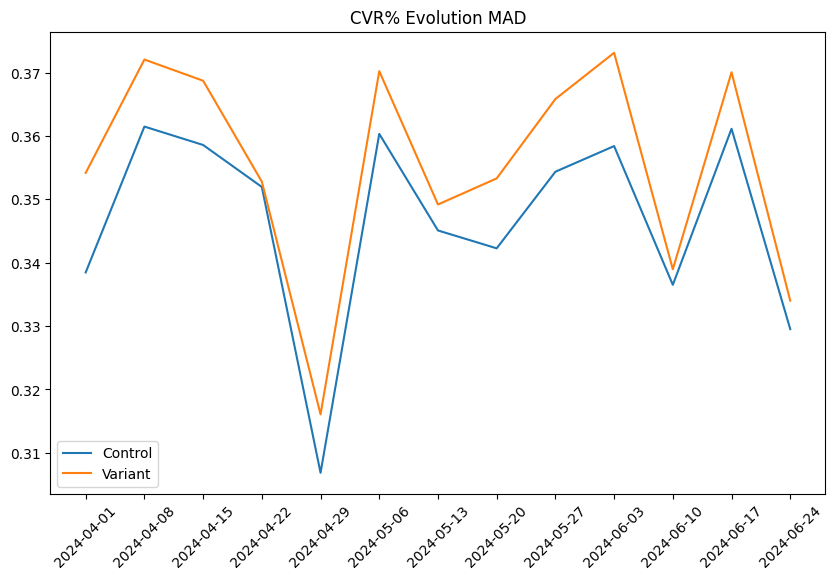

In [42]:
# plot
X_AXIS = 'week_start'
CONTROL = 'nsw_cvr_control'
VARIANT = 'nsw_cvr_variant'

plt.clf()

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(output[X_AXIS], output[CONTROL], color=blue, label='Control')
ax.plot(output[X_AXIS], output[VARIANT], color=orange, label='Variant')

ax.set(xlabel='', 
       ylabel='',
       title='CVR% Evolution MAD')

ax.grid(False)

ax.set_xticks(output[X_AXIS])
ax.set_xticklabels(output[X_AXIS].dt.strftime('%Y-%m-%d'))

plt.legend()
plt.xticks(rotation=45)
plt.show()

In [43]:
df['p_creation_date'] = pd.to_datetime(df['p_creation_date'])

cond1 = df['p_creation_date'] >= '2024-04-01'
cond2 = df['p_creation_date'] < '2024-07-01'
cond3 = df['city'] == 'MAD'

df_ab = df[(cond1 & cond2 & cond3)].copy()

METRIC_IS_A_RATIO = True # if true its a ratio between two different
METRIC_NAME = 'nsw_cvr' # name of the final metric
MULTIPLE_METRICS = ['oe_dynamic_session_id','ce_dynamic_session_id'] # metrics to compute ratio, if metric_is_a_ratio
GROUP_BY_METRICS = ['city', 'month_start'] # dimensions for final group
GROUP_BY_GRANULARITY = 'p_creation_date' # smaller granularity for t-test 
VARIANT_COLUMN = 'variant' # column name to distingtush variant
CONTROL_LABEL = 'Control Group' # control label
VARIANT_LABEL = 'InStorePrices' # variant label
ALPHA = 0.05 # alpha

tmp,sanity_check = perform_ab_test(
    df_ab
    ,metric_is_a_ratio=METRIC_IS_A_RATIO
    ,metric_name=METRIC_NAME
    ,multiple_metrics=MULTIPLE_METRICS
    ,groupby_metrics=GROUP_BY_METRICS
    ,group_granularity=GROUP_BY_GRANULARITY
    ,variant_column=VARIANT_COLUMN
    ,control_label = CONTROL_LABEL
    ,variant_label = VARIANT_LABEL
    ,alpha = 0.05
)

tmp['improvement'] = tmp['delta_perc_100'] > 0

output = pd.merge(tmp, w_city, on='city')
output.sort_values(by='weight', ascending=False)

# Ensure all rows are displayed
# pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')

output.sort_values(by='weight',ascending=False).head(10)

------------------------------
--------RATIO METRIC----------
------------------------------


,city,month_start,nsw_cvr_control,nsw_cvr_variant,delta_perc_100,p_value,is_significant,improvement,n_orders,weight,cumulative_weight
0,MAD,2024-04-01,0.352392,0.361772,2.661829,0.068750,False,True,303764,6.078806,12.86194
1,MAD,2024-05-01,0.341008,0.350549,2.797830,0.222702,False,True,303764,6.078806,12.86194
2,MAD,2024-06-01,0.346394,0.353652,2.095415,0.229695,False,True,303764,6.078806,12.86194


### RC and NC, country

In [44]:
df['p_creation_date'] = pd.to_datetime(df['p_creation_date'])

cond1 = df['p_creation_date'] >= '2024-04-01'
cond2 = df['p_creation_date'] < '2024-07-01'

df_ab = df[(cond1 & cond2)].copy()

METRIC_IS_A_RATIO = True # if true its a ratio between two different
METRIC_NAME = 'nsw_cvr' # name of the final metric
MULTIPLE_METRICS = ['oe_dynamic_session_id','ce_dynamic_session_id'] # metrics to compute ratio, if metric_is_a_ratio
GROUP_BY_METRICS = ['is_recurrent_groceries', 'country','week_start'] # dimensions for final group
GROUP_BY_GRANULARITY = 'p_creation_date' # smaller granularity for t-test 
VARIANT_COLUMN = 'variant' # column name to distingtush variant
CONTROL_LABEL = 'Control Group' # control label
VARIANT_LABEL = 'InStorePrices' # variant label
ALPHA = 0.05 # alpha

tmp,sanity_check = perform_ab_test(
    df_ab
    ,metric_is_a_ratio=METRIC_IS_A_RATIO
    ,metric_name=METRIC_NAME
    ,multiple_metrics=MULTIPLE_METRICS
    ,groupby_metrics=GROUP_BY_METRICS
    ,group_granularity=GROUP_BY_GRANULARITY
    ,variant_column=VARIANT_COLUMN
    ,control_label = CONTROL_LABEL
    ,variant_label = VARIANT_LABEL
    ,alpha = 0.05
)

tmp['improvement'] = tmp['delta_perc_100'] > 0

output = pd.merge(tmp, w_country, on='country')
output.sort_values(by='weight', ascending=False)

# Ensure all rows are displayed
# pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')

output.sort_values(by='weight',ascending=False).head(10)

------------------------------
--------RATIO METRIC----------
------------------------------


,is_recurrent_groceries,country,week_start,nsw_cvr_control,nsw_cvr_variant,delta_perc_100,p_value,is_significant,improvement,n_orders,weight,cumulative_weight
100,True,ES,2024-06-03,0.400108,0.399702,-0.101435,0.985212,False,False,1115992,22.332793,22.332793
90,False,ES,2024-06-24,0.080926,0.074913,-7.431016,0.361835,False,False,1115992,22.332793,22.332793
78,False,ES,2024-04-01,0.077725,0.069709,-10.313394,0.096756,False,False,1115992,22.332793,22.332793
79,False,ES,2024-04-08,0.092466,0.093819,1.462515,0.829431,False,True,1115992,22.332793,22.332793
80,False,ES,2024-04-15,0.089942,0.091332,1.545474,0.838348,False,True,1115992,22.332793,22.332793
81,False,ES,2024-04-22,0.089640,0.092567,3.264987,0.586476,False,True,1115992,22.332793,22.332793
82,False,ES,2024-04-29,0.081597,0.071696,-12.134227,0.198203,False,False,1115992,22.332793,22.332793
83,False,ES,2024-05-06,0.097020,0.096991,-0.030099,0.996637,False,False,1115992,22.332793,22.332793
84,False,ES,2024-05-13,0.099861,0.097645,-2.219552,0.806309,False,False,1115992,22.332793,22.332793
86,False,ES,2024-05-27,0.088325,0.089133,0.914691,0.903276,False,True,1115992,22.332793,22.332793


In [27]:
rc = output[output['is_recurrent_groceries'] == True][['country','week_start','nsw_cvr_control','nsw_cvr_variant']]
nc = output[output['is_recurrent_groceries'] == False][['country','week_start','nsw_cvr_control','nsw_cvr_variant']]

merged = pd.merge(rc, nc, on=['country','week_start'], suffixes=('_rc','_nc'))
merged

,country,week_start,nsw_cvr_control_rc,nsw_cvr_variant_rc,nsw_cvr_control_nc,nsw_cvr_variant_nc
0,AM,2024-04-01,0.464020,0.454956,0.105405,0.095405
1,AM,2024-04-08,0.462172,0.418289,0.111627,0.158411
2,AM,2024-04-15,0.469510,0.399268,0.135613,0.127619
3,AM,2024-04-22,0.447198,0.453969,0.114038,0.119333
4,AM,2024-04-29,0.433205,0.424998,0.106284,0.099946
...,...,...,...,...,...,...
274,UG,2024-05-27,0.337437,0.365561,0.076267,0.073796
275,UG,2024-06-03,0.342441,0.364750,0.070482,0.065261
276,UG,2024-06-10,0.348413,0.375187,0.061577,0.064090
277,UG,2024-06-17,0.353839,0.383086,0.065740,0.033869


<Figure size 640x480 with 0 Axes>

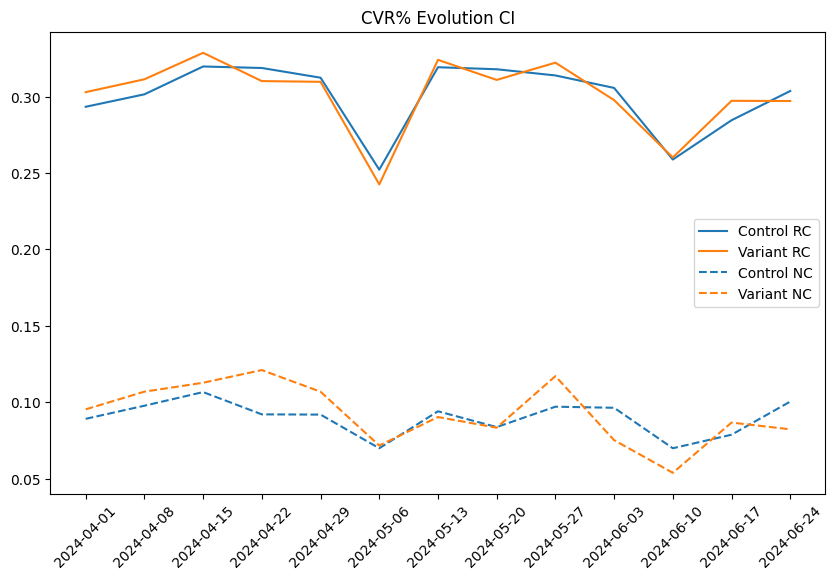

In [28]:
# plot

plt.clf()

X_AXIS = 'week_start'
COUNTRY = 'CI'
CONTROL_RC = 'nsw_cvr_control_rc'
VARIANT_RC = 'nsw_cvr_variant_rc'
CONTROL_NC = 'nsw_cvr_control_nc'
VARIANT_NC = 'nsw_cvr_variant_nc'


tmp = merged[merged['country'] ==COUNTRY].copy()

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(tmp[X_AXIS], tmp[CONTROL_RC], color=blue, label='Control RC', )
ax.plot(tmp[X_AXIS], tmp[VARIANT_RC], color=orange, label='Variant RC')
ax.plot(tmp[X_AXIS], tmp[CONTROL_NC], color=blue, label='Control NC', linestyle='dashed')
ax.plot(tmp[X_AXIS], tmp[VARIANT_NC], color=orange, label='Variant NC', linestyle='dashed')

ax.set(xlabel='', 
       ylabel='',
       title=f'CVR% Evolution {COUNTRY}')

ax.grid(False)

ax.set_xticks(tmp[X_AXIS])

plt.legend()
plt.xticks(rotation=45)
plt.show()

In [146]:
df['p_creation_date'] = pd.to_datetime(df['p_creation_date'])

cond1 = df['p_creation_date'] >= '2024-04-01'
cond2 = df['p_creation_date'] < '2024-07-01'

df_ab = df[(cond1 & cond2)].copy()

METRIC_IS_A_RATIO = True # if true its a ratio between two different
METRIC_NAME = 'nsw_cvr' # name of the final metric
MULTIPLE_METRICS = ['oe_dynamic_session_id','ce_dynamic_session_id'] # metrics to compute ratio, if metric_is_a_ratio
GROUP_BY_METRICS = ['is_recurrent_groceries', 'country'] # dimensions for final group
GROUP_BY_GRANULARITY = 'p_creation_date' # smaller granularity for t-test 
VARIANT_COLUMN = 'variant' # column name to distingtush variant
CONTROL_LABEL = 'Control Group' # control label
VARIANT_LABEL = 'InStorePrices' # variant label
ALPHA = 0.05 # alpha

tmp,sanity_check = perform_ab_test(
    df_ab
    ,metric_is_a_ratio=METRIC_IS_A_RATIO
    ,metric_name=METRIC_NAME
    ,multiple_metrics=MULTIPLE_METRICS
    ,groupby_metrics=GROUP_BY_METRICS
    ,group_granularity=GROUP_BY_GRANULARITY
    ,variant_column=VARIANT_COLUMN
    ,control_label = CONTROL_LABEL
    ,variant_label = VARIANT_LABEL
    ,alpha = 0.05
)

tmp['improvement'] = tmp['delta_perc_100'] > 0

output = pd.merge(tmp, w_country, on='country')
output.sort_values(by='weight', ascending=False)

# Ensure all rows are displayed
# pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')

output.sort_values(by='weight',ascending=False).head(10)

------------------------------
--------RATIO METRIC----------
------------------------------


,is_recurrent_groceries,country,nsw_cvr_control,nsw_cvr_variant,delta_perc_100,p_value,is_significant,improvement,n_orders,weight,cumulative_weight
6,False,ES,0.090884,0.089816,-1.174923,0.624547,False,False,1115992,22.332793,22.332793
7,True,ES,0.380288,0.381672,0.363886,0.814847,False,True,1115992,22.332793,22.332793
34,False,RO,0.109545,0.105966,-3.267575,0.381157,False,False,773989,15.488763,37.821557
35,True,RO,0.398540,0.401075,0.636016,0.787816,False,True,773989,15.488763,37.821557
30,False,PL,0.122394,0.118042,-3.555550,0.195789,False,False,644551,12.898501,50.720058
31,True,PL,0.400327,0.403873,0.885832,0.560282,False,True,644551,12.898501,50.720058
41,True,UA,0.368619,0.370921,0.624446,0.470036,False,True,534943,10.705069,61.425127
40,False,UA,0.125358,0.124422,-0.746908,0.746091,False,False,534943,10.705069,61.425127
23,True,MA,0.326217,0.320476,-1.759815,0.427058,False,False,513640,10.278762,71.703888
22,False,MA,0.052846,0.051533,-2.483105,0.506451,False,False,513640,10.278762,71.703888


In [159]:
df['p_creation_date'] = pd.to_datetime(df['p_creation_date'])

cond1 = df['p_creation_date'] >= '2024-04-01'
cond2 = df['p_creation_date'] < '2024-07-01'

df_ab = df[(cond1 & cond2)].copy()

METRIC_IS_A_RATIO = True # if true its a ratio between two different
METRIC_NAME = 'nsw_cvr' # name of the final metric
MULTIPLE_METRICS = ['oe_dynamic_session_id','ce_dynamic_session_id'] # metrics to compute ratio, if metric_is_a_ratio
GROUP_BY_METRICS = ['is_recurrent_groceries', 'city'] # dimensions for final group
GROUP_BY_GRANULARITY = 'p_creation_date' # smaller granularity for t-test 
VARIANT_COLUMN = 'variant' # column name to distingtush variant
CONTROL_LABEL = 'Control Group' # control label
VARIANT_LABEL = 'InStorePrices' # variant label
ALPHA = 0.05 # alpha

tmp,sanity_check = perform_ab_test(
    df_ab
    ,metric_is_a_ratio=METRIC_IS_A_RATIO
    ,metric_name=METRIC_NAME
    ,multiple_metrics=MULTIPLE_METRICS
    ,groupby_metrics=GROUP_BY_METRICS
    ,group_granularity=GROUP_BY_GRANULARITY
    ,variant_column=VARIANT_COLUMN
    ,control_label = CONTROL_LABEL
    ,variant_label = VARIANT_LABEL
    ,alpha = 0.05
)

tmp['improvement'] = tmp['delta_perc_100'] > 0

output = pd.merge(tmp, w_city, on='city')
output.sort_values(by='weight', ascending=False)

# Ensure all rows are displayed
# pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')

output.sort_values(by='weight',ascending=False).head(50)

------------------------------
--------RATIO METRIC----------
------------------------------


,is_recurrent_groceries,city,nsw_cvr_control,nsw_cvr_variant,delta_perc_100,p_value,is_significant,improvement,n_orders,weight,cumulative_weight
47,True,BUC,0.395609,0.395382,-0.057344,0.984307,False,False,338960,6.783134,6.783134
46,False,BUC,0.108588,0.110284,1.562381,0.741204,False,True,338960,6.783134,6.783134
140,False,MAD,0.095675,0.098273,2.715849,0.509020,False,True,303764,6.078806,12.861940
141,True,MAD,0.367989,0.376200,2.231142,0.025825,True,True,303764,6.078806,12.861940
252,False,TBI,0.079060,0.080300,1.569105,0.721906,False,True,247350,4.949871,17.811811
253,True,TBI,0.411530,0.407338,-1.018677,0.482516,False,False,247350,4.949871,17.811811
52,False,CAS,0.050886,0.050891,0.008685,0.998921,False,True,225960,4.521823,22.333634
53,True,CAS,0.352433,0.347565,-1.381282,0.563030,False,False,225960,4.521823,22.333634
286,False,WAW,0.133870,0.137729,2.882459,0.473532,False,True,204013,4.082628,26.416261
287,True,WAW,0.397787,0.405686,1.985652,0.172990,False,True,204013,4.082628,26.416261


In [162]:
df['p_creation_date'] = pd.to_datetime(df['p_creation_date'])

cond1 = df['p_creation_date'] >= '2024-04-01'
cond2 = df['p_creation_date'] < '2024-07-01'

df_ab = df[(cond1 & cond2)].copy()

METRIC_IS_A_RATIO = True # if true its a ratio between two different
METRIC_NAME = 'nsw_cvr' # name of the final metric
MULTIPLE_METRICS = ['oe_dynamic_session_id','ce_dynamic_session_id'] # metrics to compute ratio, if metric_is_a_ratio
GROUP_BY_METRICS = ['n_stores_instore_price_enabled'] # dimensions for final group
GROUP_BY_GRANULARITY = 'p_creation_date' # smaller granularity for t-test 
VARIANT_COLUMN = 'variant' # column name to distingtush variant
CONTROL_LABEL = 'Control Group' # control label
VARIANT_LABEL = 'InStorePrices' # variant label
ALPHA = 0.05 # alpha

tmp,sanity_check = perform_ab_test(
    df_ab
    ,metric_is_a_ratio=METRIC_IS_A_RATIO
    ,metric_name=METRIC_NAME
    ,multiple_metrics=MULTIPLE_METRICS
    ,groupby_metrics=GROUP_BY_METRICS
    ,group_granularity=GROUP_BY_GRANULARITY
    ,variant_column=VARIANT_COLUMN
    ,control_label = CONTROL_LABEL
    ,variant_label = VARIANT_LABEL
    ,alpha = 0.05
)

tmp['improvement'] = tmp['delta_perc_100'] > 0
tmp

------------------------------
--------RATIO METRIC----------
------------------------------


,n_stores_instore_price_enabled,nsw_cvr_control,nsw_cvr_variant,delta_perc_100,p_value,is_significant,improvement
0,0,0.376972,0.367942,-2.395422,0.439151,False,False
1,1,0.344050,0.341539,-0.729809,0.684561,False,False
2,2,0.350980,0.350732,-0.070845,0.958138,False,False
3,3,0.306280,0.309064,0.909136,0.250200,False,True
4,4,0.264887,0.266225,0.504878,0.575373,False,True
5,5,0.262478,0.259605,-1.094568,0.289910,False,False
6,6,0.331960,0.331732,-0.068779,0.954509,False,False
7,7,0.274763,0.272541,-0.808959,0.559500,False,False
8,8,0.267569,0.269917,0.877731,0.627966,False,True
9,9,0.311083,0.316204,1.646383,0.056045,False,True


In [ ]:
df['p_creation_date'] = pd.to_datetime(df['p_creation_date'])

cond1 = df['p_creation_date'] >= '2024-04-01'
cond2 = df['p_creation_date'] < '2024-07-01'

df_ab = df[(cond1 & cond2)].copy()

METRIC_IS_A_RATIO = True # if true its a ratio between two different
METRIC_NAME = 'ret_g' # name of the final metric
MULTIPLE_METRICS = ['n_ret_orders_g','n_orders'] # metrics to compute ratio, if metric_is_a_ratio
GROUP_BY_METRICS = ['is_recurrent_groceries', 'month_start'] # dimensions for final group
GROUP_BY_GRANULARITY = 'p_creation_date' # smaller granularity for t-test 
VARIANT_COLUMN = 'variant' # column name to distingtush variant
CONTROL_LABEL = 'Control Group' # control label
VARIANT_LABEL = 'InStorePrices' # variant label
ALPHA = 0.05 # alpha

tmp,sanity_check = perform_ab_test(
    df_ab
    ,metric_is_a_ratio=METRIC_IS_A_RATIO
    ,metric_name=METRIC_NAME
    ,multiple_metrics=MULTIPLE_METRICS
    ,groupby_metrics=GROUP_BY_METRICS
    ,group_granularity=GROUP_BY_GRANULARITY
    ,variant_column=VARIANT_COLUMN
    ,control_label = CONTROL_LABEL
    ,variant_label = VARIANT_LABEL
    ,alpha = 0.05
)

tmp['improvement'] = tmp['delta_perc_100'] > 0
tmp

# Hypothesis 2: AOV

Customers will place greater baskets of AOV if they see the instore prices tag

## By month

In [30]:
df['p_creation_date'] = pd.to_datetime(df['p_creation_date'])

cond1 = df['p_creation_date'] >= '2024-01-01'
cond2 = df['p_creation_date'] < '2024-07-01'

df_ab = df[(cond1 & cond2)].copy()

METRIC_IS_A_RATIO = True # if true its a ratio between two different
METRIC_NAME = 'aov' # name of the final metric
MULTIPLE_METRICS = ['sum_order_total_purchase_eur','n_orders'] # metrics to compute ratio, if metric_is_a_ratio
GROUP_BY_METRICS = ['month_start'] # dimensions for final group
GROUP_BY_GRANULARITY = 'p_creation_date' # smaller granularity for t-test 
VARIANT_COLUMN = 'variant' # column name to distingtush variant
CONTROL_LABEL = 'Control Group' # control label
VARIANT_LABEL = 'InStorePrices' # variant label
ALPHA = 0.05 # alpha

tmp,sanity_check = perform_ab_test(
    df_ab
    ,metric_is_a_ratio=METRIC_IS_A_RATIO
    ,metric_name=METRIC_NAME
    ,multiple_metrics=MULTIPLE_METRICS
    ,groupby_metrics=GROUP_BY_METRICS
    ,group_granularity=GROUP_BY_GRANULARITY
    ,variant_column=VARIANT_COLUMN
    ,control_label = CONTROL_LABEL
    ,variant_label = VARIANT_LABEL
    ,alpha = 0.05
)

tmp['improvement'] = tmp['delta_perc_100'] > 0
tmp.sort_values(by='month_start')

------------------------------
--------RATIO METRIC----------
------------------------------


,month_start,aov_control,aov_variant,delta_perc_100,p_value,is_significant,improvement
0,2024-01-01,17.935932,17.859580,-0.425694,0.862523,False,False
1,2024-02-01,20.643958,20.578958,-0.314859,0.872919,False,False
2,2024-03-01,21.590534,21.614780,0.112299,0.913027,False,True
3,2024-04-01,21.754515,21.721579,-0.151396,0.883075,False,False
4,2024-05-01,21.443496,21.516475,0.340331,0.758101,False,True
5,2024-06-01,21.317916,21.273819,-0.206853,0.825014,False,False


## By country

In [31]:
df['p_creation_date'] = pd.to_datetime(df['p_creation_date'])

cond1 = df['p_creation_date'] >= '2024-04-01'
cond2 = df['p_creation_date'] < '2024-07-01'

df_ab = df[(cond1 & cond2)].copy()

METRIC_IS_A_RATIO = True # if true its a ratio between two different
METRIC_NAME = 'aov' # name of the final metric
MULTIPLE_METRICS = ['sum_order_total_purchase_eur','n_orders'] # metrics to compute ratio, if metric_is_a_ratio
GROUP_BY_METRICS = ['country'] # dimensions for final group
GROUP_BY_GRANULARITY = 'p_creation_date' # smaller granularity for t-test 
VARIANT_COLUMN = 'variant' # column name to distingtush variant
CONTROL_LABEL = 'Control Group' # control label
VARIANT_LABEL = 'InStorePrices' # variant label
ALPHA = 0.05 # alpha

tmp,sanity_check = perform_ab_test(
    df_ab
    ,metric_is_a_ratio=METRIC_IS_A_RATIO
    ,metric_name=METRIC_NAME
    ,multiple_metrics=MULTIPLE_METRICS
    ,groupby_metrics=GROUP_BY_METRICS
    ,group_granularity=GROUP_BY_GRANULARITY
    ,variant_column=VARIANT_COLUMN
    ,control_label = CONTROL_LABEL
    ,variant_label = VARIANT_LABEL
    ,alpha = 0.05
)

tmp['improvement'] = tmp['delta_perc_100'] > 0

output = pd.merge(tmp, w_country, on='country')
output.sort_values(by='weight', ascending=False)

------------------------------
--------RATIO METRIC----------
------------------------------


,country,aov_control,aov_variant,delta_perc_100,p_value,is_significant,improvement,n_orders,weight,cumulative_weight
3,ES,27.525122,27.588493,0.230229,0.747336,False,True,1115992,22.332793,22.332793
17,RO,26.412291,26.150253,-0.992106,0.133870,False,False,773989,15.488763,37.821557
15,PL,23.145199,23.178554,0.144114,0.895539,False,True,644551,12.898501,50.720058
20,UA,12.998818,12.871485,-0.979577,0.095506,False,False,534943,10.705069,61.425127
11,MA,14.664139,14.193973,-3.206232,0.000013,True,False,513640,10.278762,71.703888
4,GE,18.750849,18.560847,-1.013299,0.189944,False,False,289873,5.800824,77.504713
7,IT,26.615754,26.580391,-0.132864,0.793968,False,False,273365,5.470473,82.975186
8,KE,14.555481,14.860217,2.093613,0.011467,True,True,179809,3.598267,86.573453
16,PT,21.746945,21.808529,0.283186,0.683592,False,True,150907,3.019892,89.593344
2,CI,14.199198,14.612537,2.911003,0.002893,True,True,114685,2.295031,91.888375


## By city

In [34]:
df['p_creation_date'] = pd.to_datetime(df['p_creation_date'])

cond1 = df['p_creation_date'] >= '2024-04-01'
cond2 = df['p_creation_date'] < '2024-07-01'

df_ab = df[(cond1 & cond2)].copy()

METRIC_IS_A_RATIO = True # if true its a ratio between two different
METRIC_NAME = 'aov' # name of the final metric
MULTIPLE_METRICS = ['sum_order_total_purchase_eur','n_orders'] # metrics to compute ratio, if metric_is_a_ratio
GROUP_BY_METRICS = ['city'] # dimensions for final group
GROUP_BY_GRANULARITY = 'p_creation_date' # smaller granularity for t-test 
VARIANT_COLUMN = 'variant' # column name to distingtush variant
CONTROL_LABEL = 'Control Group' # control label
VARIANT_LABEL = 'InStorePrices' # variant label
ALPHA = 0.05 # alpha

tmp,sanity_check = perform_ab_test(
    df_ab
    ,metric_is_a_ratio=METRIC_IS_A_RATIO
    ,metric_name=METRIC_NAME
    ,multiple_metrics=MULTIPLE_METRICS
    ,groupby_metrics=GROUP_BY_METRICS
    ,group_granularity=GROUP_BY_GRANULARITY
    ,variant_column=VARIANT_COLUMN
    ,control_label = CONTROL_LABEL
    ,variant_label = VARIANT_LABEL
    ,alpha = 0.05
)

tmp['improvement'] = tmp['delta_perc_100'] > 0

output = pd.merge(tmp, w_city, on='city')
output.sort_values(by='weight', ascending=False)

# Ensure all rows are displayed
pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows')

output.sort_values(by='weight',ascending=False)

------------------------------
--------RATIO METRIC----------
------------------------------


,city,aov_control,aov_variant,delta_perc_100,p_value,is_significant,improvement,n_orders,weight,cumulative_weight
23,BUC,27.510042,27.209002,-1.094289,7.501471e-02,False,False,338960,6.783134,6.783134
70,MAD,29.103066,29.364692,0.898963,1.608846e-01,False,True,303764,6.078806,12.861940
126,TBI,18.643090,18.427937,-1.154059,1.666274e-01,False,False,247350,4.949871,17.811811
26,CAS,14.544710,14.061983,-3.318914,2.623401e-04,True,False,225960,4.521823,22.333634
143,WAW,23.521560,23.260569,-1.109582,3.492145e-01,False,False,204013,4.082628,26.416261
12,BCN,28.752586,28.341400,-1.430083,1.364839e-01,False,False,194413,3.890516,30.306778
84,NBO,14.626828,14.978420,2.403753,6.292968e-03,True,True,157449,3.150807,33.457585
55,KIE,14.802078,14.735516,-0.449682,6.531263e-01,False,False,132512,2.651778,36.109363
58,KRA,23.754764,23.699236,-0.233753,8.345661e-01,False,False,93843,1.877949,37.987313
65,LIS,21.999136,22.014833,0.071353,9.335456e-01,False,True,90094,1.802926,39.790238


## Hipothesis 2: Retention

In [35]:
df['p_creation_date'] = pd.to_datetime(df['p_creation_date'])

cond1 = df['p_creation_date'] >= '2024-01-01'
cond2 = df['p_creation_date'] < '2024-07-01'

df_ab = df[(cond1 & cond2)].copy()

METRIC_IS_A_RATIO = True # if true its a ratio between two different
METRIC_NAME = 'ret_g' # name of the final metric
MULTIPLE_METRICS = ['n_ret_orders_g','n_orders'] # metrics to compute ratio, if metric_is_a_ratio
GROUP_BY_METRICS = ['month_start'] # dimensions for final group
GROUP_BY_GRANULARITY = 'p_creation_date' # smaller granularity for t-test 
VARIANT_COLUMN = 'variant' # column name to distingtush variant
CONTROL_LABEL = 'Control Group' # control label
VARIANT_LABEL = 'InStorePrices' # variant label
ALPHA = 0.05 # alpha

tmp,sanity_check = perform_ab_test(
    df_ab
    ,metric_is_a_ratio=METRIC_IS_A_RATIO
    ,metric_name=METRIC_NAME
    ,multiple_metrics=MULTIPLE_METRICS
    ,groupby_metrics=GROUP_BY_METRICS
    ,group_granularity=GROUP_BY_GRANULARITY
    ,variant_column=VARIANT_COLUMN
    ,control_label = CONTROL_LABEL
    ,variant_label = VARIANT_LABEL
    ,alpha = 0.05
)

tmp['improvement'] = tmp['delta_perc_100'] > 0
tmp.sort_values(by='month_start')

------------------------------
--------RATIO METRIC----------
------------------------------


,month_start,ret_g_control,ret_g_variant,delta_perc_100,p_value,is_significant,improvement
0,2024-01-01,0.917468,0.880804,-3.996212,0.030398,True,False
1,2024-02-01,0.872117,0.870742,-0.157688,0.722110,False,False
2,2024-03-01,0.846883,0.847190,0.036240,0.934427,False,True
3,2024-04-01,0.844484,0.844704,0.026050,0.942740,False,True
4,2024-05-01,0.833456,0.835772,0.277839,0.603855,False,True
5,2024-06-01,0.803964,0.804068,0.012897,0.992202,False,True


In [39]:
df['p_creation_date'] = pd.to_datetime(df['p_creation_date'])

cond1 = df['p_creation_date'] >= '2024-04-01'
cond2 = df['p_creation_date'] < '2024-07-01'
cond3 = df['is_recurrent_groceries']==False

df_ab = df[(cond1 & cond2 & cond3)].copy()

METRIC_IS_A_RATIO = True # if true its a ratio between two different
METRIC_NAME = 'ret_g' # name of the final metric
MULTIPLE_METRICS = ['n_ret_orders_g','n_orders'] # metrics to compute ratio, if metric_is_a_ratio
GROUP_BY_METRICS = ['country'] # dimensions for final group
GROUP_BY_GRANULARITY = 'p_creation_date' # smaller granularity for t-test 
VARIANT_COLUMN = 'variant' # column name to distingtush variant
CONTROL_LABEL = 'Control Group' # control label
VARIANT_LABEL = 'InStorePrices' # variant label
ALPHA = 0.05 # alpha

tmp,sanity_check = perform_ab_test(
    df_ab
    ,metric_is_a_ratio=METRIC_IS_A_RATIO
    ,metric_name=METRIC_NAME
    ,multiple_metrics=MULTIPLE_METRICS
    ,groupby_metrics=GROUP_BY_METRICS
    ,group_granularity=GROUP_BY_GRANULARITY
    ,variant_column=VARIANT_COLUMN
    ,control_label = CONTROL_LABEL
    ,variant_label = VARIANT_LABEL
    ,alpha = 0.05
)

tmp['improvement'] = tmp['delta_perc_100'] > 0

output = pd.merge(tmp, w_country, on='country')
output.sort_values(by='weight', ascending=False)

------------------------------
--------RATIO METRIC----------
------------------------------


,country,ret_g_control,ret_g_variant,delta_perc_100,p_value,is_significant,improvement,n_orders,weight,cumulative_weight
3,ES,0.288021,0.304478,5.713578,0.051489,False,True,1115992,22.332793,22.332793
17,RO,0.282277,0.297342,5.336996,0.187493,False,True,773989,15.488763,37.821557
15,PL,0.298122,0.316186,6.059418,0.099443,False,True,644551,12.898501,50.720058
20,UA,0.307532,0.305355,-0.708107,0.827415,False,False,534943,10.705069,61.425127
11,MA,0.369918,0.370112,0.052598,0.989513,False,True,513640,10.278762,71.703888
4,GE,0.348705,0.347479,-0.351498,0.950482,False,False,289873,5.800824,77.504713
7,IT,0.269926,0.269759,-0.061740,0.989363,False,False,273365,5.470473,82.975186
8,KE,0.373770,0.369065,-1.258767,0.841344,False,False,179809,3.598267,86.573453
16,PT,0.303217,0.306275,1.008641,0.877427,False,True,150907,3.019892,89.593344
2,CI,0.389267,0.381264,-2.056029,0.779487,False,False,114685,2.295031,91.888375


In [43]:
df['p_creation_date'] = pd.to_datetime(df['p_creation_date'])

cond1 = df['p_creation_date'] >= '2024-04-01'
cond2 = df['p_creation_date'] < '2024-07-01'
cond3 = df['is_recurrent_groceries']==False

df_ab = df[(cond1 & cond2 & cond3)].copy()

METRIC_IS_A_RATIO = True # if true its a ratio between two different
METRIC_NAME = 'ret_g' # name of the final metric
MULTIPLE_METRICS = ['n_ret_orders_g','n_orders'] # metrics to compute ratio, if metric_is_a_ratio
GROUP_BY_METRICS = ['city'] # dimensions for final group
GROUP_BY_GRANULARITY = 'p_creation_date' # smaller granularity for t-test 
VARIANT_COLUMN = 'variant' # column name to distingtush variant
CONTROL_LABEL = 'Control Group' # control label
VARIANT_LABEL = 'InStorePrices' # variant label
ALPHA = 0.05 # alpha

tmp,sanity_check = perform_ab_test(
    df_ab
    ,metric_is_a_ratio=METRIC_IS_A_RATIO
    ,metric_name=METRIC_NAME
    ,multiple_metrics=MULTIPLE_METRICS
    ,groupby_metrics=GROUP_BY_METRICS
    ,group_granularity=GROUP_BY_GRANULARITY
    ,variant_column=VARIANT_COLUMN
    ,control_label = CONTROL_LABEL
    ,variant_label = VARIANT_LABEL
    ,alpha = 0.05
)

tmp['improvement'] = tmp['delta_perc_100'] > 0

output = pd.merge(tmp, w_city, on='city')
output.sort_values(by='weight', ascending=False)

# Ensure all rows are displayed
pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows')

output.sort_values(by='weight',ascending=False)

------------------------------
--------RATIO METRIC----------
------------------------------


,city,ret_g_control,ret_g_variant,delta_perc_100,p_value,is_significant,improvement,n_orders,weight,cumulative_weight
23,BUC,0.297294,0.326662,9.878412,0.127269,False,True,338960,6.783134,6.783134
70,MAD,0.262955,0.299917,14.056437,0.074572,False,True,303764,6.078806,12.861940
126,TBI,0.323224,0.316267,-2.152412,0.744824,False,False,247350,4.949871,17.811811
26,CAS,0.386211,0.402316,4.170177,0.568506,False,True,225960,4.521823,22.333634
143,WAW,0.319743,0.338229,5.781532,0.321641,False,True,204013,4.082628,26.416261
12,BCN,0.308886,0.350045,13.324999,0.080205,False,True,194413,3.890516,30.306778
84,NBO,0.385654,0.369839,-4.100944,0.547611,False,False,157449,3.150807,33.457585
55,KIE,0.282535,0.272888,-3.414290,0.618985,False,False,132512,2.651778,36.109363
58,KRA,0.297353,0.277324,-6.735985,0.614599,False,False,93843,1.877949,37.987313
65,LIS,0.309768,0.338966,9.425765,0.293648,False,True,90094,1.802926,39.790238


In [47]:
df['p_creation_date'] = pd.to_datetime(df['p_creation_date'])

cond1 = df['p_creation_date'] >= '2024-04-01'
cond2 = df['p_creation_date'] < '2024-07-01'

df_ab = df[(cond1 & cond2)].copy()

METRIC_IS_A_RATIO = True # if true its a ratio between two different
METRIC_NAME = 'ret_g' # name of the final metric
MULTIPLE_METRICS = ['n_ret_orders_g','n_orders'] # metrics to compute ratio, if metric_is_a_ratio
GROUP_BY_METRICS = ['is_recurrent_groceries', 'month_start'] # dimensions for final group
GROUP_BY_GRANULARITY = 'p_creation_date' # smaller granularity for t-test 
VARIANT_COLUMN = 'variant' # column name to distingtush variant
CONTROL_LABEL = 'Control Group' # control label
VARIANT_LABEL = 'InStorePrices' # variant label
ALPHA = 0.05 # alpha

tmp,sanity_check = perform_ab_test(
    df_ab
    ,metric_is_a_ratio=METRIC_IS_A_RATIO
    ,metric_name=METRIC_NAME
    ,multiple_metrics=MULTIPLE_METRICS
    ,groupby_metrics=GROUP_BY_METRICS
    ,group_granularity=GROUP_BY_GRANULARITY
    ,variant_column=VARIANT_COLUMN
    ,control_label = CONTROL_LABEL
    ,variant_label = VARIANT_LABEL
    ,alpha = 0.05
)

tmp['improvement'] = tmp['delta_perc_100'] > 0
tmp

------------------------------
--------RATIO METRIC----------
------------------------------


,is_recurrent_groceries,month_start,ret_g_control,ret_g_variant,delta_perc_100,p_value,is_significant,improvement
0,False,2024-04-01,0.316463,0.321211,1.500578,0.529617,False,True
1,False,2024-05-01,0.306912,0.316054,2.978613,0.260522,False,True
2,False,2024-06-01,0.289339,0.293403,1.404613,0.675800,False,True
3,True,2024-04-01,0.863592,0.863440,-0.017676,0.954487,False,False
4,True,2024-05-01,0.856424,0.857871,0.168973,0.678007,False,True
5,True,2024-06-01,0.824792,0.824900,0.013052,0.991838,False,True


# Check N stores with feature distribution

In [10]:
df.head()

,p_creation_date,city,country,platform,n_stores_instore_price_enabled,is_recurrent_groceries,variant,ce_dynamic_session_id,oe_dynamic_session_id,n_orders,n_customers,sum_order_total_purchase_eur,n_ret_orders_s,n_ret_orders_g,month_start,week_start
4,2024-05-28,WAW,PL,IOS,9,True,Control Group,1683,709,704,693,16739.048672,482,601,2024-05-01,2024-05-27
6,2024-05-24,MAD,ES,IOS,3,True,Control Group,3377,1173,1171,1142,35222.290000,771,1039,2024-05-01,2024-05-20
9,2024-05-22,BUC,RO,Android,10,True,Control Group,1871,777,769,754,21171.245874,561,693,2024-05-01,2024-05-20
10,2024-04-13,MIL,IT,IOS,7,True,Control Group,1714,370,361,359,10194.110000,183,276,2024-04-01,2024-04-08
11,2024-02-26,CUG,ES,Android,5,True,Control Group,33,19,23,19,776.100000,18,22,2024-02-01,2024-02-26


In [11]:
df['p_creation_date'] = pd.to_datetime(df['p_creation_date'])

cond1 = df['p_creation_date'] >= '2024-04-01'
cond2 = df['p_creation_date'] < '2024-07-01'

df_ab = df[(cond1 & cond2)].copy()

METRIC_IS_A_RATIO = True # if true its a ratio between two different
METRIC_NAME = 'cvr' # name of the final metric
MULTIPLE_METRICS = ['oe_dynamic_session_id','ce_dynamic_session_id'] # metrics to compute ratio, if metric_is_a_ratio
GROUP_BY_METRICS = ['n_stores_instore_price_enabled'] # dimensions for final group
GROUP_BY_GRANULARITY = 'p_creation_date' # smaller granularity for t-test 
VARIANT_COLUMN = 'variant' # column name to distingtush variant
CONTROL_LABEL = 'Control Group' # control label
VARIANT_LABEL = 'InStorePrices' # variant label
ALPHA = 0.05 # alpha

tmp,sanity_check = perform_ab_test(
    df_ab
    ,metric_is_a_ratio=METRIC_IS_A_RATIO
    ,metric_name=METRIC_NAME
    ,multiple_metrics=MULTIPLE_METRICS
    ,groupby_metrics=GROUP_BY_METRICS
    ,group_granularity=GROUP_BY_GRANULARITY
    ,variant_column=VARIANT_COLUMN
    ,control_label = CONTROL_LABEL
    ,variant_label = VARIANT_LABEL
    ,alpha = 0.05
)

tmp['improvement'] = tmp['delta_perc_100'] > 0

output = pd.merge(tmp, city_n_stores_disttrib, on='n_stores_instore_price_enabled')
output.to_csv('fig4')

------------------------------
--------RATIO METRIC----------
------------------------------


NameError: name 'city_n_stores_disttrib' is not defined

In [70]:
city_n_stores_disttrib = df.groupby('n_stores_instore_price_enabled')['city'].nunique().reset_index()
city_n_stores_disttrib

,n_stores_instore_price_enabled,city
0,0,4
1,1,23
2,2,43
3,3,25
4,4,25
5,5,12
6,6,9
7,7,3
8,8,1
9,9,2


In [12]:
df['p_creation_date'] = pd.to_datetime(df['p_creation_date'])

cond1 = df['p_creation_date'] >= '2024-04-01'
cond2 = df['p_creation_date'] < '2024-07-01'

df_ab = df[(cond1 & cond2)].copy()

METRIC_IS_A_RATIO = True # if true its a ratio between two different
METRIC_NAME = 'cvr' # name of the final metric
MULTIPLE_METRICS = ['oe_dynamic_session_id','ce_dynamic_session_id'] # metrics to compute ratio, if metric_is_a_ratio
GROUP_BY_METRICS = ['n_stores_instore_price_enabled','city'] # dimensions for final group
GROUP_BY_GRANULARITY = 'p_creation_date' # smaller granularity for t-test 
VARIANT_COLUMN = 'variant' # column name to distingtush variant
CONTROL_LABEL = 'Control Group' # control label
VARIANT_LABEL = 'InStorePrices' # variant label
ALPHA = 0.05 # alpha

tmp,sanity_check = perform_ab_test(
    df_ab
    ,metric_is_a_ratio=METRIC_IS_A_RATIO
    ,metric_name=METRIC_NAME
    ,multiple_metrics=MULTIPLE_METRICS
    ,groupby_metrics=GROUP_BY_METRICS
    ,group_granularity=GROUP_BY_GRANULARITY
    ,variant_column=VARIANT_COLUMN
    ,control_label = CONTROL_LABEL
    ,variant_label = VARIANT_LABEL
    ,alpha = 0.05
)

tmp['improvement'] = tmp['delta_perc_100'] > 0

output = pd.merge(tmp, w_city, on='city')
output.sort_values(by='cumulative_weight', inplace=True)

------------------------------
--------RATIO METRIC----------
------------------------------


In [13]:
output.head()

,n_stores_instore_price_enabled,city,cvr_control,cvr_variant,delta_perc_100,p_value,is_significant,improvement,n_orders,weight,cumulative_weight
147,10,BUC,0.372499,0.371585,-0.245428,0.933034,False,False,338960,6.783134,6.783134
77,3,MAD,0.346537,0.355272,2.520767,0.019828,True,True,303764,6.078806,12.861940
149,42,TBI,0.369570,0.366537,-0.820732,0.580031,False,False,247350,4.949871,17.811811
138,7,CAS,0.319273,0.314181,-1.594730,0.508462,False,False,225960,4.521823,22.333634
146,9,WAW,0.376865,0.384223,1.952598,0.188658,False,True,204013,4.082628,26.416261


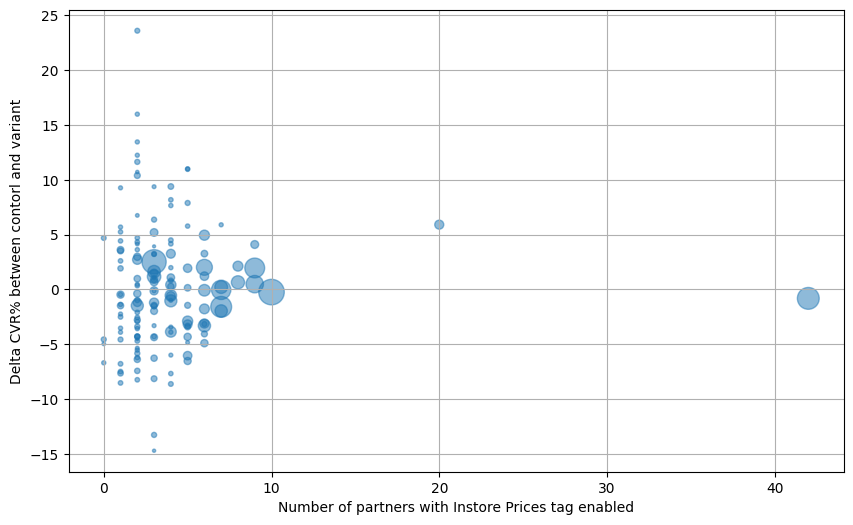

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot
sc = ax.scatter(
    output['n_stores_instore_price_enabled'], 
    output['delta_perc_100'], 
    s=output['weight'] * 50,  # Adjust the multiplier for appropriate bubble size
    alpha=0.5,
)

# Adding a color bar
cbar.set_label('Variant CVR%')

ax.set_xlabel('Number of partners with Instore Prices tag enabled')
ax.set_ylabel('Delta CVR% between contorl and variant')
ax.set_title('')

ax.grid()
        
plt.show()

## Tmp

In [6]:
df.columns

Index(['p_creation_date', 'city', 'country', 'platform',
       'n_stores_instore_price_enabled', 'is_recurrent_groceries', 'variant',
       'ce_dynamic_session_id', 'oe_dynamic_session_id', 'n_orders',
       'n_customers', 'sum_order_total_purchase_eur', 'n_ret_orders_s',
       'n_ret_orders_g', 'month_start', 'week_start'],
      dtype='object')